# 21M.387 Fundamentals of Music Processing
## Lab 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
import fmp

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 3)

## Exercise 1

`np.roll()` is a useful function for "modulo" shifting the elements of an array. It comes in handy when creating the chord template matrix.

Use this function to create a $10 \times 10$ matrix where each row is a shifted version `np.arange(10)`. Hint: the diagonal of the matrix should be all zeros.

Plot this matrix using `plt.imshow`.

[[0 1 2 3 4 5 6 7 8 9]
 [9 0 1 2 3 4 5 6 7 8]
 [8 9 0 1 2 3 4 5 6 7]
 [7 8 9 0 1 2 3 4 5 6]
 [6 7 8 9 0 1 2 3 4 5]
 [5 6 7 8 9 0 1 2 3 4]
 [4 5 6 7 8 9 0 1 2 3]
 [3 4 5 6 7 8 9 0 1 2]
 [2 3 4 5 6 7 8 9 0 1]
 [1 2 3 4 5 6 7 8 9 0]]


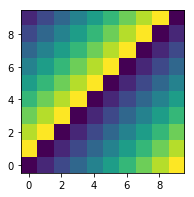

In [2]:
a = np.arange(10)
b = np.mod(np.roll(a[::-1],1)[:,None]+a,10)
print b
plt.imshow(b, origin='lower')


## Exercise 2

There are two normalizations we often use: 
- $L^2$ or Euclidean Norm
- $L^1$ or Manhattan Norm 

Applying a Euclidean Norm produces a vector of length 1.  
Applying a Manhattan Norm produces a vector whose components sum to 1. This can be useful for vectors acting as a probability distribution where we want:
$$\sum_{n=1}^{N}{p_n} = 1$$

Write the function `L1_normalize_rows` that applies the Manhattan Norm to all rows of a matrix and returns the normalized matrix. 

- Load the test data below.
- Test your function by plotting the un-normalized and normalized matrix with `plt.colorbar()` so you can see the results.
- Print the values to check your function as well

In [3]:
def L1_normalize_rows(mtx):
    return 1.0/(np.abs(mtx).sum(axis=1)[:,None])*mtx

m = np.load('data/lab_ex2.npy')
L1_normalized_m = L1_normalize_rows(m)
print L1_normalized_m
print np.sum(L1_normalized_m,axis=1)

[[ 0.12903226  0.25806452  0.03225806  0.22580645  0.09677419  0.25806452]
 [ 0.04761905  0.19047619  0.04761905  0.0952381   0.33333333  0.28571429]
 [ 0.19047619  0.02380952  0.14285714  0.21428571  0.21428571  0.21428571]
 [ 0.22727273  0.22727273  0.22727273  0.13636364  0.04545455  0.13636364]]
[ 1.  1.  1.  1.]


## Exercise 3

__a__: What are the 10 pitches (approximately) that correspond to the first 10 harmonics of the note C4? Round to the nearest integer. Feel free to use the functions `fmp.pitch_to_freq` and `fmp.freq_to_pitch`

__b__: Now convert the array of pitches to an array of pitch classes.

## Exercise 4

Write a function to create a _normalized_ binary chord template. It takes as input a list of pitches and returns a chroma template (ie, an array of length 12).

In [5]:
def binary_chord_template(pitches):
    pass

Now use your function to create the following chord templates and print out the results:
- A minor
- F major
- E power chord (this is a chord of only two notes: the root and the fifth)

## Exercise 5

We have seen examples of temporal smoothing (CENS chromagrams). Here you will create a function that does temporal smoothing on all the rows of a matrix (like a chromagram).

Write the function `temporal_smoothing(mtx, win_len)` where $L$ = `win_len` is the length of the rectangular averaging window. For each row vector of the input matrix, $x$, create a smoothed version, $x^L$. This can be done using `np.convolve`, by convolving $x$ with a rectangular window of length $L$ and amplitude $1/L$.

This is the equivalent of performing the operation:

$$ x^L(n) = {1 \over L} \sum_{l=-(L-1)/2}^{(L-1)/2}x(n+l) $$

To keep $x^L$ the same size as $x$, use the optional argument `mode='same'` in `np.convolve`.

Test your function with the example chormagram below. Try different values of `win_len` to see the effect.

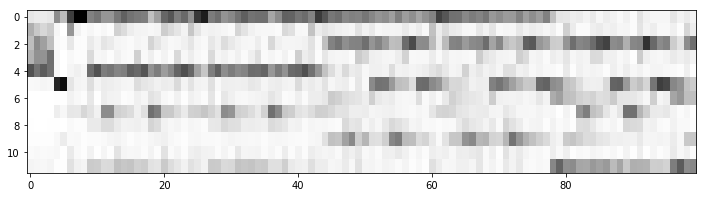

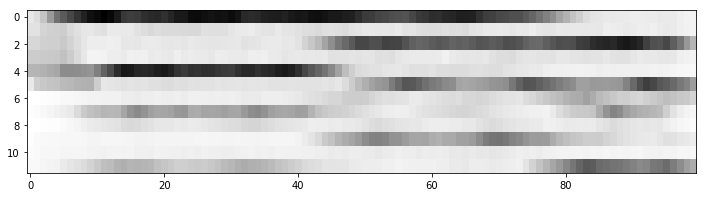

In [7]:
def temporal_smoothing(mtx, win_len): #mtx is the chromagram
    rect = np.full(win_len,1.0/win_len)
    #rect = np.hanning(win_len)
    smoothed_mtx = np.apply_along_axis(lambda row: np.convolve(rect,row,mode='same'), 1, mtx)
    return smoothed_mtx

# the regular chromagram
chroma = np.load('data/lab_ex4.npy')
plt.figure()
plt.imshow(chroma, interpolation='nearest', aspect='auto', cmap='Greys');

# here, plot the smoothed chromagram
plt.figure()
smoothed_chroma = temporal_smoothing(chroma, 10) #test different win_len
plt.imshow(smoothed_chroma, interpolation='nearest', aspect='auto', cmap='Greys');


## Exercise 6

Write a function to calculate the score for an estimated chord array. The function arguments are two sequences of chord data: 
- an algorithmically generated set of chords (`est`) and 
- a ground truth set (`gt`).

The score returned should be:

$$S = { \text{# Correct} \over \text{ # Total} } $$

Inside the function, you will need to ensure that both arrays are of the same length.

Test your code and print out the result.

In [22]:
def calc_chord_score(est, gt):
    return sum([x==y for x,y in zip(est,gt[:len(est)])])/float(len(est))


In [23]:
# load the estimated chord data (previously computed by me). It has a feature rate of:
# 22050. / 2048
est = np.load('data/lab_ex6.npy')

# load the ground truth
ff = 22050. / 2048
gt = fmp.load_chord_annotation('audio/beatles_let_it_be.lab', ff)
print len(gt)
print len(est)
print calc_chord_score(est,gt)

2620
645
0.82015503876


The answer should be: 0.82015503876


## Exercise 7

Say we have a Markov Model with these parameters:

- $I = 3$ (number of states)
- $\mathcal{A} = \lbrace \mathbf{C,G,F} \rbrace $ (the states)
- The probability of starting the song on $\mathbf{C}$ is 3 times more likley than starting on $\mathbf{F}$ or $\mathbf{G}$.
- The probability of staying on the same chord is 8 times more likely than moving to a different chord, but there is no difference in probability as to which chord is moved to.

Write the vector $\mathcal{C}$ and matrix $\mathcal{A}$ as `numpy` arrays.

## Exercise 8

Write the function `markov_sequence_prob(seq, init_p, trans_p)` which takes as input:
- a sequence of states
- the initial probability vector
- the transition probability matrix

Given the Markov model of _Exercise 7_, find the probability of these two sequences:

$$S_1 = (\mathbf{C,C,G,F,F,G,C,C})$$
$$S_2 = (\mathbf{F,F,C,C,C,G,G,G})$$

Which is more likley and by how much?

In [ ]:
def markov_sequence_prob(seq, init_p, trans_p):
    pass
